# Project 2 
## Vivian Gunawan

In [1]:
# Import dependencies
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
# file path to json files
business_path = 'yelp_dataset/yelp_academic_dataset_business.json'
review_path = 'yelp_dataset/yelp_academic_dataset_review.json'

# Task 1
Algorithm of choice: K-means clustering

In [3]:
from sklearn.cluster import KMeans

## Clustering based on longitude and latitude

In [4]:
df_b = pd.read_json(business_path, lines=True)

In [5]:
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [6]:
# finding the most 'popular' culinary district -> Austin
df_b['city'].value_counts()

Austin                       22416
Portland                     18203
Vancouver                    13330
Atlanta                      12612
Orlando                      10637
                             ...  
Columbus/Hilliard                1
WESTERVILLE                      1
Jamaica  Plain                   1
Kitsilano                        1
Altamonte Springs Orlando        1
Name: city, Length: 836, dtype: int64

In [7]:
df_b_austin = df_b[df_b.city == "Austin"]

In [8]:
df_b_austin.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,30.346169,-97.711458,5.0,30,1,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...","{'Monday': '12:15-17:0', 'Tuesday': '12:15-17:..."
9,tXvdYGvlEceDljN8gt2_3Q,Capital City Barber Shop,"615 W Slaughter Ln, Ste 113",Austin,TX,78748,30.172706,-97.799920,4.0,5,0,"{'BusinessAcceptsCreditCards': 'False', 'Resta...","Barbers, Beauty & Spas","{'Monday': '9:0-17:0', 'Tuesday': '9:0-19:0', ..."
24,nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,6505 N Interstate 35,Austin,TX,78752,30.326377,-97.704543,3.0,139,1,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
27,8XyEpVdAO0o6iVkVxkWosQ,PS Property Management Company,"2506 S Lamar Blvd, Ste 2",Austin,TX,78704,30.246465,-97.778738,4.5,9,1,{'BusinessAcceptsCreditCards': 'True'},"Home Services, Real Estate, Property Management","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
37,NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"5625 Eiger Rd, Ste 160",Austin,TX,78735,30.244902,-97.857409,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Accept...","Chiropractors, Health & Medical","{'Monday': '9:0-17:45', 'Tuesday': '12:0-17:45..."


[[ 30.26739756 -97.74284964]
 [ 42.34485728 -71.08092594]
 [ 30.37162899 -97.72815282]
 [ 30.25766534 -97.80761246]
 [ 30.39899069 -97.850667  ]
 [ 30.172274   -97.82150401]
 [ 30.43014194 -97.76199399]
 [ 30.37874147 -97.68476205]
 [ 30.30021904 -97.97377562]
 [ 30.22175896 -97.76704831]
 [ 30.26935303 -97.68951917]
 [ 30.23366032 -97.87030463]
 [ 30.33697576 -97.75772237]
 [ 30.33155476 -97.71992844]
 [ 30.37487663 -97.94576658]
 [ 30.40042388 -97.72380563]
 [ 30.30647698 -97.70003266]
 [ 30.29833397 -97.74072393]
 [ 30.19625952 -97.98118245]
 [ 30.23271253 -97.79636362]
 [ 30.1626844  -97.68213891]
 [ 30.23637283 -97.7273509 ]
 [ 30.29666639 -97.82812095]
 [ 30.16187053 -97.79166044]
 [ 30.2460908  -97.59001627]
 [ 30.23773409 -97.84909512]
 [ 30.40637978 -97.74733551]
 [ 30.43561774 -97.67848727]
 [ 30.34841062 -97.63983245]
 [ 30.44720466 -97.79356656]
 [ 30.35972906 -97.68926415]
 [ 30.32690294 -97.86494276]
 [ 30.37959064 -97.88810654]
 [ 30.25991944 -97.76012127]
 [ 30.36320708

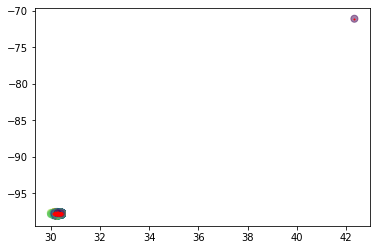

In [9]:
features = df_b_austin.filter(['latitude','longitude'], axis=1)
kmeans = KMeans(n_clusters=100).fit(features)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df_b_austin['latitude'], df_b_austin['longitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=1)
plt.show()

Looking at the clustering above, the optimal number of cluster is two. However, I dont think this is an appropriate way of clustering the data since the difference between latitude and longitude in the same city shouldn't be that far and is actually just decimal points away.Hence below I am going to try to normalize the data, remove outliers and re-apply the clustering algorithm.

In [10]:
features.describe()

,latitude,longitude
count,22416.000000,22416.000000
mean,30.300632,-97.758155
std,0.109178,0.187940
min,30.002736,-98.082776
25%,30.246307,-97.783612
50%,30.286937,-97.745209
75%,30.359038,-97.725385
max,42.344857,-71.080926


In [11]:
# remove outliers 
from scipy import stats

z_scores = stats.zscore(features)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
features_cleaned = features[filtered_entries]

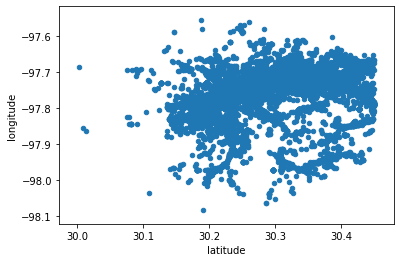

In [12]:
features_cleaned.plot.scatter(x="latitude", y="longitude")

In [13]:
# copy the data
features_z_scaled = features_cleaned.copy()

# apply normalization technique
features_z_scaled['latitude'] = (features_z_scaled['latitude'] - features_z_scaled['latitude'].mean()) / features_z_scaled['latitude'].std()
features_z_scaled['longitude'] = (features_z_scaled['longitude'] - features_z_scaled['longitude'].mean()) / features_z_scaled['longitude'].std()

# view normalized data  
display(features_z_scaled)

,latitude,longitude
8,0.624231,0.801433
9,-1.725882,-0.679062
24,0.356081,0.917154
27,-0.726578,-0.324558
37,-0.747757,-1.641197
...,...,...
160564,1.865452,-0.311676
160566,1.332167,0.488971
160567,-1.209575,-1.846229
160577,1.786005,-0.107029


[[-1.11198104 -0.86940857]
 [ 0.90519243  0.77104889]
 [ 1.50081151 -0.33591428]
 [-0.46153858  0.36039482]
 [ 0.12755587 -2.93878116]]


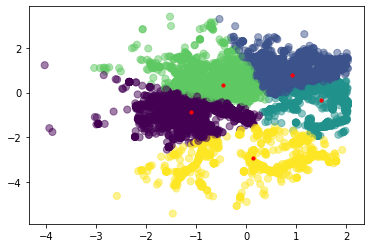

In [14]:
kmeans = KMeans(n_clusters=5).fit(features_z_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(features_z_scaled['latitude'], features_z_scaled['longitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10)
plt.show()

In [15]:
business_id_cleaned= df_b_austin["business_id"][filtered_entries]
res = {business_id_cleaned.iloc[i]: [kmeans.labels_[i]] for i in range(len(business_id_cleaned))}
df_clustered = pd.DataFrame(res).T
df_clustered.reset_index(inplace=True)
df_clustered.columns = ["business_id","cluster"]
df_clustered.to_csv('ll_clustered.csv')

## Clustering based on review text

Do once only, takes too long.

In [16]:
df_r = pd.read_json(review_path, lines=True)

In [17]:
df_r.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [18]:
m = df_r.business_id.isin(df_b_austin.business_id)
df_r_austin = df_r[m]

In [19]:
df_r_austin.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
11,Qv_lQb1Yu9DGsUO3r-enNw,Ngl83gs3n22SzLAsNw2znw,iZxfWlfNPXV_0S1xO8QNSQ,2,3,0,0,Disappointing. Bolt is a follow up of Fanny's ...,2013-01-02 18:12:15
13,m1GlqFGIN5eayrbb2IbRZg,B7YSV6r1ePAXc69FkDDuZw,wZgUAuDuEGPEzKK-PsngKQ,1,0,0,0,I wish I could give them zero stars. The call ...,2014-06-27 22:06:55
20,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46
23,OMGz2BaL3bzRvY2hEp1-wQ,d01SZKYmReEar7varZB0HQ,I2OblwJG8_XzFxxoHU0vVQ,4,5,1,1,I just had my lasik done last week and I am re...,2010-05-14 14:33:54
27,dprQ8G5J01mlV6Z5W19LtQ,ednTYrjsoD3HtpZ-Z29SAQ,AW_dMex_BXFzgBJFxAjDuQ,5,0,0,0,Erika was amazing! After months of trying to f...,2016-08-03 22:55:45


In [20]:
df_r_austin.business_id.value_counts()

MGzro82Fi4LYvc86acoONQ    5071
cs6HfZNykLVitm09jWFqWg    4901
bZiIIUcpgxh8mpKMDhdqbA    4818
1Eq16r_MSnvPsnIykBdy9w    3878
YZs1gNSh_sN8JmN_nrpxeA    3603
                          ... 
8BxmyFhp0avSjdF1CjgIig       5
Sy3EgBgkXzXIO1zo83WiXg       5
yde5Km8r0hEpZLaMSNfPhA       5
4QuOsKNNSWR9_PsXIa-8jA       5
a1sdhCOIfwMMWhSMiRwsGQ       5
Name: business_id, Length: 22416, dtype: int64

In [21]:
df_r_austin.to_csv('review_austin.csv')

A single business ID, could correspond to multiple reviews. To cluster the businesses based on the reviews, we modify the dataframe so that the review string contains all the reviews corresponding to that business id. 

The new dataframe will only have the attributes, business id, text and stars. 

Now we want to convert the text into a representation that is understood by the computer. To do this I am using the Term Frequency-Inverse Document Frequency measure. This method represents the importance of a word to a corpus.

To compute the overall star rating corresponding to a business based on the review, we just average it.

### Skip to here to just load the austin reviews.

In [22]:
df_r_austin= pd.read_csv('review_austin.csv')

In [23]:
df_r_austin

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,11,Qv_lQb1Yu9DGsUO3r-enNw,Ngl83gs3n22SzLAsNw2znw,iZxfWlfNPXV_0S1xO8QNSQ,2,3,0,0,Disappointing. Bolt is a follow up of Fanny's ...,2013-01-02 18:12:15
1,13,m1GlqFGIN5eayrbb2IbRZg,B7YSV6r1ePAXc69FkDDuZw,wZgUAuDuEGPEzKK-PsngKQ,1,0,0,0,I wish I could give them zero stars. The call ...,2014-06-27 22:06:55
2,20,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46
3,23,OMGz2BaL3bzRvY2hEp1-wQ,d01SZKYmReEar7varZB0HQ,I2OblwJG8_XzFxxoHU0vVQ,4,5,1,1,I just had my lasik done last week and I am re...,2010-05-14 14:33:54
4,27,dprQ8G5J01mlV6Z5W19LtQ,ednTYrjsoD3HtpZ-Z29SAQ,AW_dMex_BXFzgBJFxAjDuQ,5,0,0,0,Erika was amazing! After months of trying to f...,2016-08-03 22:55:45
...,...,...,...,...,...,...,...,...,...,...
1425222,8635378,hKxvxtCjEJAwD_7AcnA_iQ,VEB7udH-qIN_ON1SMyWrPg,zM98ZSIJyuBQabyYornLpw,3,0,0,0,Bartender was friendly and attentive. We came ...,2021-01-10 04:10:45
1425223,8635385,OPUk-HnYvoFV9T_6u_ylmw,eMtifT85cLy3w8OX3KvUMA,Db6dLD1bZsy_y8fTd1_qcA,5,0,0,0,"Tabitha, you rock!! I absolutely LOOOVE my las...",2011-02-04 21:55:50
1425224,8635387,UWHPbsQzfrmjtDCbq2AeDg,Cx85VtZCOwdzHATPlB6fyQ,Wn8j-1-ity6hdjP4bC_wkw,2,0,0,0,Terrible pho. Literally zero flavor. And the c...,2021-01-17 22:09:10
1425225,8635393,Xf7iZpZC0MdosClyzZTmGg,spFkIHa7x15DJe4gVnSCqw,XVmp1LmrXKB8cXomLKbu9w,5,2,0,1,"Very nice ambiance, clean inside and food is g...",2018-05-28 01:50:26


In [24]:
df_r_austin

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,11,Qv_lQb1Yu9DGsUO3r-enNw,Ngl83gs3n22SzLAsNw2znw,iZxfWlfNPXV_0S1xO8QNSQ,2,3,0,0,Disappointing. Bolt is a follow up of Fanny's ...,2013-01-02 18:12:15
1,13,m1GlqFGIN5eayrbb2IbRZg,B7YSV6r1ePAXc69FkDDuZw,wZgUAuDuEGPEzKK-PsngKQ,1,0,0,0,I wish I could give them zero stars. The call ...,2014-06-27 22:06:55
2,20,GDgXjXSZCA1iNQWD7OHXfg,1RCRKuHgP3FskGUVnmFdxg,mOnesB4IF9j6-ZmHoOHOig,4,0,0,0,I think their rice dishes are way better than ...,2017-05-26 03:05:46
3,23,OMGz2BaL3bzRvY2hEp1-wQ,d01SZKYmReEar7varZB0HQ,I2OblwJG8_XzFxxoHU0vVQ,4,5,1,1,I just had my lasik done last week and I am re...,2010-05-14 14:33:54
4,27,dprQ8G5J01mlV6Z5W19LtQ,ednTYrjsoD3HtpZ-Z29SAQ,AW_dMex_BXFzgBJFxAjDuQ,5,0,0,0,Erika was amazing! After months of trying to f...,2016-08-03 22:55:45
...,...,...,...,...,...,...,...,...,...,...
1425222,8635378,hKxvxtCjEJAwD_7AcnA_iQ,VEB7udH-qIN_ON1SMyWrPg,zM98ZSIJyuBQabyYornLpw,3,0,0,0,Bartender was friendly and attentive. We came ...,2021-01-10 04:10:45
1425223,8635385,OPUk-HnYvoFV9T_6u_ylmw,eMtifT85cLy3w8OX3KvUMA,Db6dLD1bZsy_y8fTd1_qcA,5,0,0,0,"Tabitha, you rock!! I absolutely LOOOVE my las...",2011-02-04 21:55:50
1425224,8635387,UWHPbsQzfrmjtDCbq2AeDg,Cx85VtZCOwdzHATPlB6fyQ,Wn8j-1-ity6hdjP4bC_wkw,2,0,0,0,Terrible pho. Literally zero flavor. And the c...,2021-01-17 22:09:10
1425225,8635393,Xf7iZpZC0MdosClyzZTmGg,spFkIHa7x15DJe4gVnSCqw,XVmp1LmrXKB8cXomLKbu9w,5,2,0,1,"Very nice ambiance, clean inside and food is g...",2018-05-28 01:50:26


In [25]:
import re
def pre_process(text):
    
    text = re.sub("[^a-zA-Z]",  " ",str(text))
    
    #remove tags
    text=re.sub("","",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # lowercase
    text=text.lower()
    return text

df_r_austin['clean_text'] = df_r_austin['text'].apply(lambda x:pre_process(x))

In [26]:
df_r_austin.to_csv('review_austin_clean.csv')

### skip here to just load cleaned austin review

In [27]:
df_r_austin= pd.read_csv('review_austin_clean.csv')

In [28]:
df_r_austin.drop(columns=['review_id','user_id','useful','funny','cool','date','text'],axis=1)

,Unnamed: 0,Unnamed: 0.1,business_id,stars,clean_text
0,0,11,iZxfWlfNPXV_0S1xO8QNSQ,2,disappointing bolt is a follow up of fanny s f...
1,1,13,wZgUAuDuEGPEzKK-PsngKQ,1,i wish i could give them zero stars the call t...
2,2,20,mOnesB4IF9j6-ZmHoOHOig,4,i think their rice dishes are way better than ...
3,3,23,I2OblwJG8_XzFxxoHU0vVQ,4,i just had my lasik done last week and i am re...
4,4,27,AW_dMex_BXFzgBJFxAjDuQ,5,erika was amazing after months of trying to fi...
...,...,...,...,...,...
1425222,1425222,8635378,zM98ZSIJyuBQabyYornLpw,3,bartender was friendly and attentive we came i...
1425223,1425223,8635385,Db6dLD1bZsy_y8fTd1_qcA,5,tabitha you rock i absolutely looove my lashes...
1425224,1425224,8635387,Wn8j-1-ity6hdjP4bC_wkw,2,terrible pho literally zero flavor and the chi...
1425225,1425225,8635393,XVmp1LmrXKB8cXomLKbu9w,5,very nice ambiance clean inside and food is go...


In [29]:
# combining all the reviews coresponding to one business
df_r_austin_text_merged = df_r_austin.copy()
df_r_austin_text_merged = df_r_austin_text_merged.groupby('business_id')['clean_text'].agg(lambda x: ' '.join(x.astype(str))).reset_index()

In [30]:
# averaging the number of stars from multiple reviews 
df_r_austin_stars_merged = df_r_austin.copy()
df_r_austin_stars_merged = df_r_austin_stars_merged.groupby('business_id')['stars'].mean().reset_index()

In [31]:
# combine to get final df
df_r_austin_merged = df_r_austin_text_merged.merge(df_r_austin_stars_merged)

In [32]:
df_r_austin_merged.head()

,business_id,clean_text,stars
0,--0zrn43LEaB4jUWTQH_Bg,rude staff and management they do not value c...,1.000000
1,--164t1nclzzmca7eDiJMw,banh mi was pretty weak incredibly good food ...,3.877551
2,--JKSSgnfoOjVDFGv692BA,fast service bucks and i was outta there defin...,4.040000
3,--jtHbM1FC1WOXIH9z9grw,i can t recommend the perfect headshot enough ...,5.000000
4,--kK4a5ggLXioTc4KrWoig,so much fun the parking next to the venue was ...,3.604167


In [33]:
df_r_austin_merged.describe()

,stars
count,22416.000000
mean,3.844372
std,0.950390
min,1.000000
25%,3.274510
50%,4.007692
75%,4.615385
max,5.000000


In [34]:
df_r_austin_merged.to_csv('review_austin_merged.csv')

### skip here to just load cleaned austin review merged

In [35]:
df_r_austin_merged = pd.read_csv('review_austin_merged.csv')

Now that each businesses have all have their review, use TFIDF to get the top 10 words for the businesses. Which later on will be used for K-means clustering.

bulk reviews -> Remove stop words -> Find Term Frequency (TF) -> Find Inverse Document Frequency (IDF) -> Find TF*IDF -> Get top 10 Keywords

In [36]:
from nltk import tokenize
from operator import itemgetter

bulk_reviews = df_r_austin_merged['clean_text'].to_list()

# Remove stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

keyword_reviews=[]

for br in bulk_reviews:
    br = [br]
    cv = CountVectorizer(stop_words=stop_words,max_features=10000)
    word_count_vector = cv.fit_transform(br)
    tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
    tfidf_transformer.fit(word_count_vector)
    feature_names= cv.get_feature_names()
    tfidf_vector=tfidf_transformer.transform(cv.transform(br))
    sorted_items=sort_coo(tfidf_vector.tocoo())
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    keyword_reviews.append(keywords.keys())


In [37]:
df_r_austin_merged["keywords"] = [" ".join(kws) for kws in keyword_reviews]

In [38]:
df_r_austin_merged.head()

,Unnamed: 0,business_id,clean_text,stars,keywords
0,0,--0zrn43LEaB4jUWTQH_Bg,rude staff and management they do not value c...,1.000000,time dry skirt back use told things place phon...
1,1,--164t1nclzzmca7eDiJMw,banh mi was pretty weak incredibly good food ...,3.877551,mi food banh hungry sandwich good pork place s...
2,2,--JKSSgnfoOjVDFGv692BA,fast service bucks and i was outta there defin...,4.040000,tire tires shop flat guerrero great guys servi...
3,3,--jtHbM1FC1WOXIH9z9grw,i can t recommend the perfect headshot enough ...,5.000000,yannik headshot experience take perfect great ...
4,4,--kK4a5ggLXioTc4KrWoig,so much fun the parking next to the venue was ...,3.604167,year austin art music christmas one great real...


In [39]:
df_r_austin_merged.drop(columns=['clean_text'],axis=1)

,Unnamed: 0,business_id,stars,keywords
0,0,--0zrn43LEaB4jUWTQH_Bg,1.000000,time dry skirt back use told things place phon...
1,1,--164t1nclzzmca7eDiJMw,3.877551,mi food banh hungry sandwich good pork place s...
2,2,--JKSSgnfoOjVDFGv692BA,4.040000,tire tires shop flat guerrero great guys servi...
3,3,--jtHbM1FC1WOXIH9z9grw,5.000000,yannik headshot experience take perfect great ...
4,4,--kK4a5ggLXioTc4KrWoig,3.604167,year austin art music christmas one great real...
...,...,...,...,...
22411,22411,zzgP0DV4OZfXkPdGNvtANQ,4.200000,would elements day customer call visit tile th...
22412,22412,zzh_hbB0Zgl2a5uL_6hXpA,5.000000,dr sarah dunagan chiropractic time axis feel p...
22413,22413,zzkku5rAHjABjQqBDiGo7w,5.000000,creek canyon daughter school year teachers pre...
22414,22414,zzqq8J7Pibxod1YcknlkWA,3.200000,store restyle lakeway place one great clothes ...


In [40]:
df_r_austin_merged.to_csv('review_austin_keywords.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe76593ebd0>]],
      dtype=object)

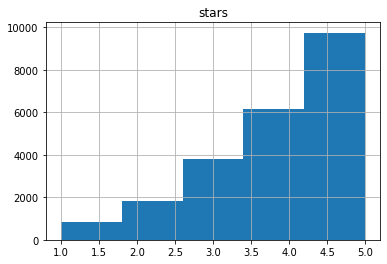

In [63]:
df_r_austin_merged.hist(column="stars",bins=5)

### skip here to just load keywords 

In [41]:
df_r_austin_merged = pd.read_csv('review_austin_keywords.csv')

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer()
df_r_austin_merged['tfidf'] = list(vectoriser.fit_transform(df_r_austin_merged['keywords']))

In [46]:
df_r_austin_merged.head()

,Unnamed: 0,Unnamed: 0.1,business_id,clean_text,stars,keywords,tfidf
0,0,0,--0zrn43LEaB4jUWTQH_Bg,rude staff and management they do not value c...,1.000000,time dry skirt back use told things place phon...,"(0, 8115)\t0.45332677711567887\n (0, 8663)\..."
1,1,1,--164t1nclzzmca7eDiJMw,banh mi was pretty weak incredibly good food ...,3.877551,mi food banh hungry sandwich good pork place s...,"(0, 6597)\t0.12794147597192643\n (0, 10940)..."
2,2,2,--JKSSgnfoOjVDFGv692BA,fast service bucks and i was outta there defin...,4.040000,tire tires shop flat guerrero great guys servi...,"(0, 7895)\t0.21495804759277207\n (0, 8834)\..."
3,3,3,--jtHbM1FC1WOXIH9z9grw,i can t recommend the perfect headshot enough ...,5.000000,yannik headshot experience take perfect great ...,"(0, 2410)\t0.398959991361533\n (0, 9408)\t0..."
4,4,4,--kK4a5ggLXioTc4KrWoig,so much fun the parking next to the venue was ...,3.604167,year austin art music christmas one great real...,"(0, 4485)\t0.16361603792736884\n (0, 4571)\..."


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


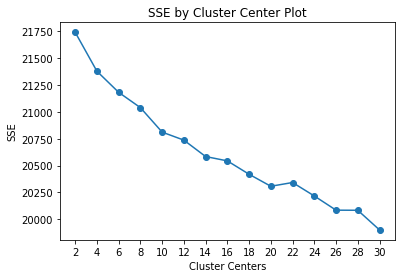

In [47]:
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
text = vectoriser.transform(df_r_austin_merged['keywords'])
find_optimal_clusters(text, 30)

In [48]:
clusters = MiniBatchKMeans(n_clusters=5, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

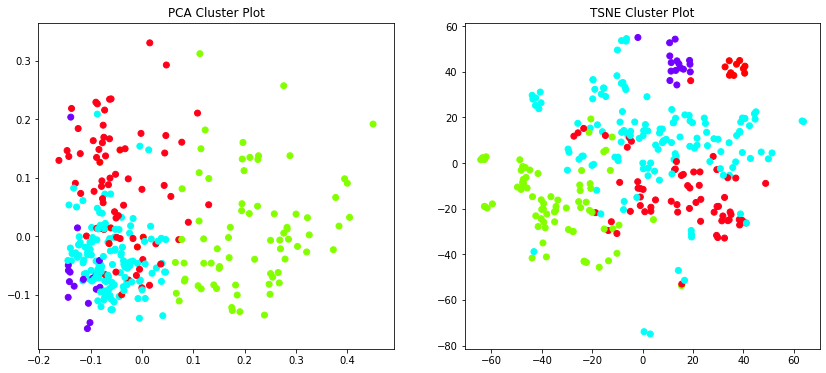

In [49]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [50]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, vectoriser.get_feature_names(), 10)


Cluster 0
get,would,staff,one,place,maintenance,office,complex,management,apartment

Cluster 1
bar,chicken,get,one,service,great,like,place,food,good

Cluster 2
home,austin,get,recommend,job,us,work,would,great,time

Cluster 3
appointment,care,dental,would,time,dentist,doctor,staff,office,dr

Cluster 4
like,customer,car,time,one,back,would,get,service,store


In [51]:
clusters

array([4, 1, 4, ..., 2, 4, 4], dtype=int32)

In [52]:
res = {df_r_austin_merged.business_id.iloc[i]: [clusters[i]] for i in range(len(clusters))}
df_clustered = pd.DataFrame(res).T
df_clustered.reset_index(inplace=True)
df_clustered.columns = ["business_id","cluster"]
df_clustered.to_csv('rt_clustered.csv')

In [53]:
df_clustered

,business_id,cluster
0,--0zrn43LEaB4jUWTQH_Bg,4
1,--164t1nclzzmca7eDiJMw,1
2,--JKSSgnfoOjVDFGv692BA,4
3,--jtHbM1FC1WOXIH9z9grw,2
4,--kK4a5ggLXioTc4KrWoig,2
...,...,...
22411,zzgP0DV4OZfXkPdGNvtANQ,4
22412,zzh_hbB0Zgl2a5uL_6hXpA,3
22413,zzkku5rAHjABjQqBDiGo7w,2
22414,zzqq8J7Pibxod1YcknlkWA,4


## Comparing the two clustering

In [54]:
df_ll_cluster = pd.read_csv('ll_clustered.csv')

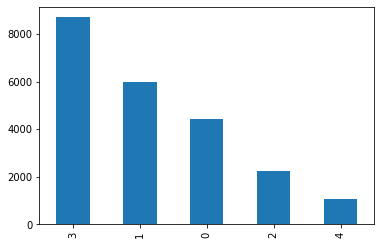

In [55]:
df_ll_cluster["cluster"].value_counts().plot(kind='bar')

In [56]:
df_rt_cluster = pd.read_csv('rt_clustered.csv')

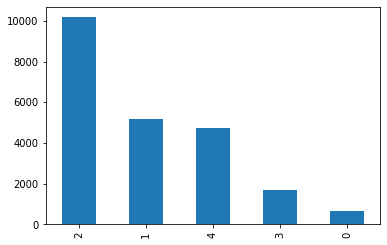

In [57]:
df_rt_cluster["cluster"].value_counts().plot(kind='bar')

In [58]:
df_cluster = pd.merge(df_ll_cluster,df_rt_cluster,on=["business_id"])

In [59]:
df_cluster.columns

Index(['Unnamed: 0_x', 'business_id', 'cluster_x', 'Unnamed: 0_y',
       'cluster_y'],
      dtype='object')

In [60]:
df_cluster.drop(columns=['Unnamed: 0_x','Unnamed: 0_y'],axis=1)

,business_id,cluster_x,cluster_y
0,N3_Gs3DnX4k9SgpwJxdEfw,1,2
1,tXvdYGvlEceDljN8gt2_3Q,0,1
2,nTIhpR7MhsALPwg_Hh14EA,1,2
3,8XyEpVdAO0o6iVkVxkWosQ,0,2
4,NVfOn7TdnHbaGH97CVB_Qg,0,3
...,...,...,...
22410,3hST-OFbQzCgte1XugEtug,2,2
22411,N1rn9F8Xj8zQRfVrrQHgnw,1,3
22412,TLg7py9H1W0E-F8BAn5OJQ,0,2
22413,m1Qw53OgkxrWu59oddVf9A,2,2


In [61]:
pd.crosstab(df_cluster.cluster_x, df_cluster.cluster_y, margins=True)

cluster_y,0,1,2,3,4,All
cluster_x,,,,,,
0,132,738,2039,484,1019,4412
1,171,1208,2575,421,1611,5986
2,86,398,1072,232,465,2253
3,230,2667,3851,449,1498,8695
4,20,181,634,87,147,1069
All,639,5192,10171,1673,4740,22415


# Task 2

Now use nearest-neighbor classification to predict the rating of each restaurant from the reviews text of individual reviews. Evaluate your methodology and describe why it
succeeds or fails

open "review_austin_keywords.csv", vectorize keywords, split into train and test. Train classifier on train data, test classifier on test data, calculate accuracy

In [64]:
df_r_austin_merged = pd.read_csv('review_austin_keywords.csv')

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer()
df_r_austin_merged['tfidf'] = list(vectoriser.fit_transform(df_r_austin_merged['keywords']))

In [75]:
X = vectoriser.transform(df_r_austin_merged['keywords'])
y = df_r_austin_merged['stars'].apply(np.floor)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [87]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
for k in range(int(np.sqrt(len(y))),len(y_train),150):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    scores.append({k:neigh.score(X_test, y_test)})

In [172]:
scores

[{149: 0.5237902135712355},
 {299: 0.5216274668829414},
 {449: 0.5218978102189781},
 {599: 0.5168964585022979},
 {749: 0.5077047850770479},
 {899: 0.49824276831576103},
 {1049: 0.49094349824276834},
 {1199: 0.48580697485806973},
 {1349: 0.4818869964855366},
 {1499: 0.47715598810489324},
 {1649: 0.4724249797242498},
 {1799: 0.4698567180319005},
 {1949: 0.4682346580156799},
 {2099: 0.46485536631522034},
 {2249: 0.46282779129494456},
 {2399: 0.46336847796701813},
 {2549: 0.46147607461476076},
 {2699: 0.46052987293863207},
 {2849: 0.46080021627466883},
 {2999: 0.4582319545823195},
 {3149: 0.45890781292241145},
 {3299: 0.45796161124628276},
 {3449: 0.4570154095701541},
 {3599: 0.45836712625033793},
 {3749: 0.45904298459042986},
 {3899: 0.46147607461476076},
 {4049: 0.4593133279264666},
 {4199: 0.46188158961881587},
 {4349: 0.4632333062989997},
 {4499: 0.46336847796701813},
 {4649: 0.4664774263314409},
 {4799: 0.4649905379832387},
 {4949: 0.4666125979994593},
 {5099: 0.4680994863476615},
 {5